In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from tabulate import tabulate

In [2]:
data=pd.read_csv(r"D:\Imarticus\workspace\train.csv")

In [3]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
data.shape

(550068, 12)

In [7]:
data.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [8]:
data.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [9]:
data.Product_Category_2.fillna('Others',inplace=True)

In [10]:
data.Product_Category_2.isnull().sum()

0

In [11]:
data.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.000000
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

since the null percentage is almost 70% we can drop the columns

In [12]:
data.drop(['Product_Category_3','User_ID','Product_ID'],axis=1,inplace=True)

In [13]:
data['Product_Category_1']=data["Product_Category_1"].astype(str)

In [14]:
data["Occupation"]=data["Occupation"].astype(str)

In [15]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [16]:
data=pd.get_dummies(data)

In [17]:
data.columns

Index(['Marital_Status', 'Purchase', 'Gender_F', 'Gender_M', 'Age_0-17',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Occupation_0', 'Occupation_1', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_2', 'Occupation_20', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1_1', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Categ

In [18]:
data.shape

(550068, 78)

In [19]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [20]:
scalerData = scaler.transform(data)
scalerData = pd.DataFrame(scalerData)

In [21]:
scalerData.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.409653,0.386320,0.246895,0.753105,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,...,0.005532,0.025695,0.010050,0.019145,0.100184,0.068819,0.078636,0.024215,0.005036,0.315666
std,0.491770,0.209740,0.431205,0.431205,0.163405,0.385166,0.489734,0.400000,0.276007,0.255136,...,0.074172,0.158224,0.099743,0.137034,0.300245,0.253146,0.269170,0.153717,0.070784,0.464781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242641,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.335505,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.502818,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1>LINEAR REGRESSION

In [22]:
x=data.drop(["Purchase"],axis=1)

In [23]:
y=data["Purchase"]

In [24]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [26]:
mean_squared_error(test_y,model.predict(test_x),squared=False)

3020.9674797304883

In [27]:
a=model.score(test_x,test_y)

<h1> DECISION TREE
   

In [28]:
model1 = tree.DecisionTreeRegressor(random_state=42)
model1.fit(train_x,train_y)

DecisionTreeRegressor(random_state=42)

In [29]:
mean_squared_error(test_y,model1.predict(test_x),squared=False)

3152.7088455753583

In [30]:
b=model1.score(test_x,test_y)

<h1> RANDOM FOREST REGRESSION

In [31]:
clf=RandomForestRegressor(max_depth=2,random_state=42)

In [32]:
clf.fit(train_x,train_y)

RandomForestRegressor(max_depth=2, random_state=42)

In [33]:
c=clf.score(test_x,test_y)

<h1>GRADIENT BOOSTING
    

In [34]:
model2=GradientBoostingRegressor(random_state=42)

In [35]:
model2.fit(train_x,train_y)

GradientBoostingRegressor(random_state=42)

In [36]:
d=model1.score(test_x,test_y)

<H1>ADA BOOSTING REGRESSOR

In [37]:
reg = AdaBoostRegressor(n_estimators=100, random_state=42)
reg.fit(train_x,train_y)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [38]:
e=reg.score(test_x,test_y)

In [39]:
f=[a,b,c,d,e]
name=['Linear Regression','DECISION TREE','RANDOM FOREST REGRESSION','GRADIENT BOOSTING REGRESSION','ADA BOOSTING REGRESSION']

In [40]:
table = [['Linear Regression',a],['DECISION TREE',b],['RANDOM FOREST REGRESSION',c],['GRADIENT BOOSTING REGRESSION',d],['ADA BOOSTING REGRESSION',e]]
print(tabulate(table))

----------------------------  --------
Linear Regression             0.636783
DECISION TREE                 0.604414
RANDOM FOREST REGRESSION      0.357938
GRADIENT BOOSTING REGRESSION  0.604414
ADA BOOSTING REGRESSION       0.43197
----------------------------  --------


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA()

In [43]:
pca.fit(train_x)

PCA()

In [44]:
pca_Ratio=pca.explained_variance_ratio_

<AxesSubplot:>

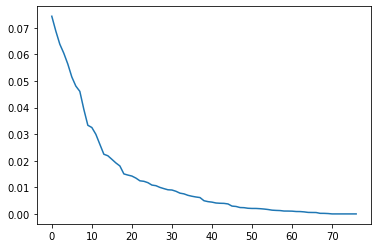

In [45]:
sns.lineplot(data=pca_Ratio)

In [46]:
cumulative=np.cumsum(pca_Ratio)

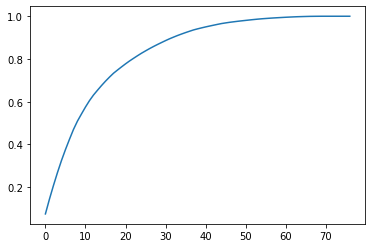

In [47]:
plt.plot(cumulative)

In [49]:
pca.transform(train_x)

array([[-6.34714423e-01, -6.86375902e-01, -6.95019172e-01, ...,
        -8.00748357e-15,  7.56339436e-15,  4.81602605e-16],
       [-7.57961540e-02,  6.04216777e-01,  2.52730801e-01, ...,
         2.83106871e-15, -1.02695630e-15, -3.93348548e-16],
       [-1.01895798e-02, -8.20696870e-01,  2.84937404e-01, ...,
        -5.41233725e-16,  7.42461648e-16,  8.91214186e-17],
       ...,
       [ 1.49530632e+00, -4.66039057e-01, -2.87312836e-01, ...,
         1.21569421e-14, -5.13478149e-15,  9.84889253e-16],
       [ 1.08657809e+00, -4.19617280e-01, -6.84287498e-01, ...,
         8.14626144e-15, -3.89271948e-15, -3.55835153e-16],
       [ 1.04896995e+00,  5.70743034e-01,  1.86449101e-02, ...,
         4.87110352e-15, -3.67067488e-15,  6.62881208e-16]])

In [50]:
import pickle

In [52]:
file=open('random_forest_regression_model.pkl','wb')